# 本練習為使用附件內所提供的iris資料進行訓練與預測，目的是為將test.csv中的型態預測出來。
以下將分為三個部分進行：
1.訓練資料的清理(train.csv) 
2. 訓練資料模型 
3.預測test.csv的資料

## Step 1
匯入查看以及處理資料所需要用的函式庫

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

將要分析的資料匯入並給予可以存取的名稱

In [208]:
dtrain = pd.read_csv("train.csv")
dtest = pd.read_csv("test.csv")

查看前幾筆資料的欄位以及數值

In [209]:
dtrain.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [210]:
dtest.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


資料中有中文的欄位名稱，為了資後分析取用方便，將其改為英文
並將資料放入DataFrame中方便操作

In [211]:
dt = dtrain.rename(columns={'花萼長度':'sepallength' ,'花萼寬度':'sepalwidth',
                      '花瓣長度':'petallength','花瓣寬度':'petalwidth',
                      '屬種':'typename'})
dt = pd.DataFrame(dt)
dt.drop(['id'], axis=1).head()


,sepallength,sepalwidth,petallength,petalwidth,typename,type
0,5.4,3.7,1.5,0.2,Iris-setosa,1
1,4.8,3.4,1.6,0.2,Iris-setosa,1
2,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5.8,4.0,1.2,0.2,Iris-setosa,1


In [212]:
dT = dT.rename(columns={'花萼長度':'sepallength' ,'花萼寬度':'sepalwidth',
                      '花瓣長度':'petallength','花瓣寬度':'petalwidth',
                      '屬種':'typename'})
dT = pd.DataFrame(dT)
dT.drop(['id'], axis=1).head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


查看每個資料欄位的描述性分析，但不包含NaN值

In [213]:
dt.describe()

,id,sepallength,sepalwidth,petallength,petalwidth,type
count,123.000000,122.000000,122.000000,123.000000,123.000000,123.000000
mean,62.000000,5.840164,3.058197,3.764228,1.204878,2.048780
std,35.651087,0.790926,0.445332,1.731536,0.754425,0.867006
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,31.500000,5.200000,2.800000,1.600000,0.300000,1.000000
50%,62.000000,5.800000,3.000000,4.300000,1.300000,2.000000
75%,92.500000,6.375000,3.300000,5.100000,1.800000,3.000000
max,123.000000,7.900000,4.400000,6.900000,2.500000,4.000000


根據上方資料分析的結果可以看出有4種不同的type

In [215]:
#查看資料中是否有空值
dt.info()
dT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
id             123 non-null int64
sepallength    122 non-null float64
sepalwidth     122 non-null float64
petallength    123 non-null float64
petalwidth     123 non-null float64
typename       123 non-null object
type           123 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
id             30 non-null int64
sepallength    30 non-null float64
sepalwidth     30 non-null float64
petallength    30 non-null float64
petalwidth     30 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [216]:
#找出資料中的NaN
findnan = dt.isnull().sum().sort_values(ascending = False)
findnan

sepalwidth     1
sepallength    1
type           0
typename       0
petalwidth     0
petallength    0
id             0
dtype: int64

In [217]:
#清理NaN資料
dt[['sepalwidth']] = dt[['sepalwidth']].fillna(np.mean(dt[['sepalwidth']]))
dt[['sepallength']] = dt[['sepallength']].fillna(np.mean(dt[['sepallength']]))

In [218]:
#查看清理結果
findnan = dt.isnull().sum().sort_values(ascending = False)
findnan

type           0
typename       0
petalwidth     0
petallength    0
sepalwidth     0
sepallength    0
id             0
dtype: int64

查看每個屬性欄位是否有極值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1173cb390>,
      dtype=object)

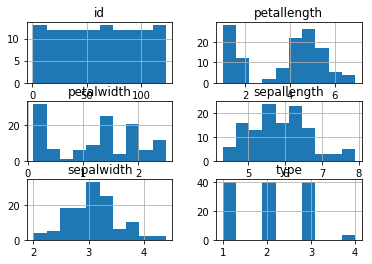

In [219]:
dt.hist()
#dT.hist() 

將資料中的不同屬性以顏色畫出來，查看不同種類的分布狀況

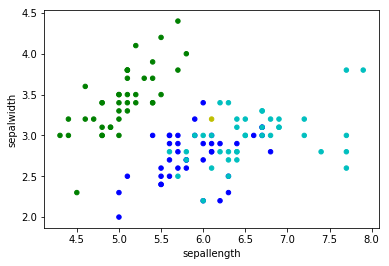

In [220]:
color = {0:'r',
         1:'g',
         2:'b',
         3:'c',
         4:'y'}
df['color'] = df['type'].map(color)
#df
df.plot.scatter(x='sepallength',y= 'sepalwidth',c= df['color'])
#df.plot.scatter(x='petallength',y= 'petalwidth',c= df['color'])
#df.plot.scatter(x='sepallength',y= 'petallength',c= df['color'])
#df.plot.scatter(x='sepalwidth',y= 'petalwidth',c= df['color'])

###### 查看資料中每個種類有多少數量

In [221]:
print(dt.keys())
dt.groupby('typename').size()

Index(['id', 'sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'typename', 'type'],
      dtype='object')


typename
Iris-new_type       3
Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
dtype: int64

## Step 2
接下來準備進行資料預測，根據scikit提供的machine learning圖，資料小於100K，因此可以使用線性的方式來分類，我們在此選擇KNN來進行預測

In [224]:
from sklearn.model_selection import train_test_split
dt_X = dt[['sepallength','sepalwidth','petallength','petalwidth']]
dt_Y = dt['type'] 
X_train, X_test, y_train, y_test = train_test_split(dt_X, dt_Y, test_size = 0.3, random_state=100)

In [225]:
# 引入 KNeighbors 模型
from sklearn import cross_validation, svm, preprocessing, metrics,neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [226]:
lin_clf = LinearSVC()
lin_clf.fit(X_train,y_train.values.ravel() )

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [227]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [228]:
# 使用 X_test 來預測結果
print(lin_clf.predict(X_test))

[1 3 3 2 3 1 1 3 1 2 1 1 1 2 3 3 1 1 2 3 3 3 1 2 2 2 1 2 3 3 2 3 2 1 3 1 2]


In [229]:
# 印出預測準確度
print(lin_clf.score(X_test, y_test))

0.9459459459459459


In [230]:
# 使用Knn,並使用X_test 來預測結果
print(knn.predict(X_test))

[1 3 3 2 3 1 1 3 1 2 1 1 1 3 3 3 1 1 2 3 3 3 1 2 3 2 1 2 3 3 2 3 3 1 3 1 2]


In [231]:
# 印出預測準確度
print(knn.predict_proba(X_test))

[[1.  0.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.2 0.6 0.2]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.2 0.8 0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.8 0.2]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.4 0.6 0. ]
 [1.  0.  0.  0. ]
 [0.  0.  0.8 0.2]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]]


In [232]:
print(knn.score(X_test, y_test))

0.972972972972973


## Step 3
由上方結果可知Knn模型準確率較高，因此我們接下來使用Knn來進行test.csv資料型態預測

In [233]:
findnan = dT.isnull().sum().sort_values(ascending = False)
findnan

petalwidth     0
petallength    0
sepalwidth     0
sepallength    0
id             0
dtype: int64

In [252]:
dT_X = dT[['sepallength','sepalwidth','petallength','petalwidth']]

In [253]:
predictResult = knn.predict(dT_X)
predictResult

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

In [254]:
testData = {'id':dtest.id ,'type':predictResult}
testDataFrame = pd.DataFrame(data = testData)
testDataFrame

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [255]:
#將訓練結果儲存至submission1.csv

testDataFrame.to_csv('submission1.csv')
